#### CAPSTONE 1: PREDICT IF CLIENT WILL SUBSCRIBE TO A TERM DEPOSIT ACCOUNT  

This Capstone Project seeks to explore the following concepts:
- Data Wrangling
- Exploratory Data Analysis
- Statistical Data Analysis
- Data Visualisation
- Data Classification: K-means clustering
- Data Correlation
- Predictive Analysis
- Machine Learning

Project Objectives:
- Apply machine learning to predict term deposit subscription  
- Identify factors that determine whether customer will subscribe to term deposit

Data source: UCI Machine Learning repository (https://archive.ics.uci.edu/).

#### IMPORT LIBRARIES

In [1]:
# import libraries

%matplotlib inline


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from random import sample
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from statsmodels.graphics.mosaicplot import mosaic
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from scipy.stats import norm
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import export_graphviz
from subprocess import call

Using TensorFlow backend.


#### IMPORT DATA

In [2]:
# Import test and train data
# convert file to dataframe
# Inspect dataframe

train = pd.read_csv(r"C:\Users\fkole\Desktop\springboard\Capstone_1\bank-additional-full.csv", sep=';')
test = pd.read_csv(r"C:\Users\fkole\Desktop\springboard\Capstone_1\bank-additional.csv", sep=';')

#### NUMERICAL EXPLORATORY DATA ANALYSIS AND DATA WRANGLING

In [3]:
# Inspect shape of dataframe

print(train.shape)

(41188, 21)


In [4]:
# Drop Duplicate rows
train = train.drop_duplicates()
train.shape

(41176, 21)

In [5]:
# Duration was included only for information purposes, and its effect on the entire data source if used, would make analysis biased

train = train.drop(['duration'], axis=1)

In [6]:
# Examine shape to confirm that duration has been dropped

train.shape

(41176, 20)

In [7]:
# View summary statistics

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.6+ MB


In [8]:
# This steps checks for empty cells. There is none in the train data

train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# Use Describe function to get summary statistics of data. 

train.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# Examine the first 5 columns of the dataset

train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# Examine the last 5 columns of the dataset

train.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
#Create a random index to check data at random

randomIndex = np.array(sample(range(len(train)),5))
# Get 5 random rows

trainSample = train.loc[randomIndex]

# Print the sample
trainSample

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
35999,60,retired,married,university.degree,no,yes,no,cellular,may,tue,1,3,1,success,-1.8,92.893,-46.2,1.266,5099.1,yes
40006,31,technician,single,university.degree,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,-1.7,94.055,-39.8,0.767,4991.6,no
19226,32,admin.,single,university.degree,no,no,no,cellular,aug,wed,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
1494,32,technician,married,professional.course,no,yes,yes,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
13733,29,technician,married,university.degree,no,no,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [13]:
#Examine all the columns in data set, to check that column names are consistent, and without unnecessary spaces 

train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [14]:
# Data Cleaning: Identify outliers using Z-Score

z_columns = train.loc[:,['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [15]:
cat_test = train.select_dtypes(['object']).columns

In [16]:
num_test = train.select_dtypes(['float64']).columns

In [17]:
z = np.abs(stats.zscore(z_columns))

print(z)

[[1.53314313 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 [1.62910732 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 [0.29017656 0.56596326 0.19544346 ... 0.88656813 0.71246263 0.33169507]
 ...
 [1.53314313 0.20498953 0.19544346 ... 2.22505906 1.49519696 2.81568858]
 [0.3815728  0.56596326 0.19544346 ... 2.22505906 1.49519696 2.81568858]
 [3.26049862 0.1559842  0.19544346 ... 2.22505906 1.49519696 2.81568858]]


In [18]:
Q1 = z_columns.quantile(0.25)
Q3 = z_columns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [19]:
print(z_columns < (Q1 - 1.5 * IQR)) , (z_columns > (Q3 + 1.5 * IQR))

         age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      False     False  False     False         False           False   
1      False     False  False     False         False           False   
2      False     False  False     False         False           False   
3      False     False  False     False         False           False   
4      False     False  False     False         False           False   
...      ...       ...    ...       ...           ...             ...   
41183  False     False  False     False         False           False   
41184  False     False  False     False         False           False   
41185  False     False  False     False         False           False   
41186  False     False  False     False         False           False   
41187  False     False  False     False         False           False   

       cons.conf.idx  euribor3m  nr.employed  
0              False      False        False  
1              False      Fal

(None,          age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
 0      False     False  False     False         False           False   
 1      False     False  False     False         False           False   
 2      False     False  False     False         False           False   
 3      False     False  False     False         False           False   
 4      False     False  False     False         False           False   
 ...      ...       ...    ...       ...           ...             ...   
 41183   True     False  False     False         False           False   
 41184  False     False  False     False         False           False   
 41185  False     False  False     False         False           False   
 41186  False     False  False     False         False           False   
 41187   True     False  False      True         False           False   
 
        cons.conf.idx  euribor3m  nr.employed  
 0              False      False        False  
 1      

In [20]:
# Although I have calculated outliers using IQR, I will not be dropping any outliers at this stage
# since the dataset should be representatitive of the real world. There is no evidence of wrongly collected data

In [21]:
# The following sections compute frequency count and percentage of unknown / missing data for each feature

In [22]:
#Frequency count

train.job.value_counts(dropna=False)

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [23]:
# Calculate percentage of missing data in feature

print(str(train.job.value_counts(dropna=False).unknown/train.job.count()*100) +  " %")

0.8014377307169226 %


In [24]:
#Frequency count

train.marital.value_counts(dropna=False)

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [25]:
# Calculate percentage of missing data in feature

print(str(train.marital.value_counts(dropna=False).unknown/train.marital.count()*100) +  " %")

0.19428793471925393 %


In [26]:
#Frequency count

train.education.value_counts(dropna=False)

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [27]:
# Calculate percentage of missing data in feature

print(str(train.education.value_counts(dropna=False).unknown/train.education.count()*100) +  " %")

4.2014765883038665 %


In [28]:
#Frequency count

train.default.value_counts(dropna=False)

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [29]:
# Calculate percentage of missing data in feature

print(str(train.default.value_counts(dropna=False).unknown/train.default.count()*100) +  " %")

20.876238585583835 %


In [30]:
#Frequency count

train.housing.value_counts(dropna=False)

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [31]:
# Calculate percentage of missing data in feature

print(str(train.housing.value_counts(dropna=False).unknown/train.housing.count()*100) +  " %")

2.4043131921507674 %


In [32]:
#Frequency count

train.loan.value_counts(dropna=False)

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [33]:
# Calculate percentage of missing data in feature

print(str(train.loan.value_counts(dropna=False).unknown/train.loan.count()*100) +  " %")

2.4043131921507674 %


In [34]:
#Frequency count

train.contact.value_counts(dropna=False)

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [35]:
#Frequency count

train.poutcome.value_counts(dropna=False)

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [36]:
# Calculate percentage of missing data in feature

print(str(train.poutcome.value_counts(dropna=False).nonexistent/train.poutcome.count()*100) +  " %")

86.33912959005245 %


In [37]:
# poutcome will  be dropped from the dataset because of the percentage of missing values 'nonexistent' is 86%

In [38]:
#Frequency count

train.pdays.value_counts(dropna=False)

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [39]:
# Calculate percentage of missing data in feature

print(str(train.pdays.value_counts(dropna=False)[999]/train.pdays.count()*100) +  " %")

96.32067223625413 %


In [40]:
# Pdays will  be dropped from the dataset because of the percentage of missing values '999' is 97%

In [41]:
#Frequency count

train.month.value_counts(dropna=False)

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [42]:
#Frequency count

train.day_of_week.value_counts(dropna=False)

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [43]:
#Frequency count

train.y.value_counts(dropna=False)

no     36537
yes     4639
Name: y, dtype: int64

In [44]:
# Drop poutcome and pdays columns because 86.4% and 96.3% respectively of column data are missing

train = train.drop(['poutcome'], axis=1)
train = train.drop(['pdays'], axis=1)

In [45]:
# Examine the new shape of dataset aafter dropping poutcome and pdays

train.shape

(41176, 18)

In [46]:
# Select features only

features = train.iloc[:,:-1].values

In [47]:
# Examine the shape of features

features.shape

(41176, 17)

In [48]:
# check type of data for features

type(features)

numpy.ndarray

In [49]:
# A number of features have missing data represented as unknown
# In the following steps I will be using the mean to reassign missing data

In [50]:
# Drop unknown in education

train['education'] = np.where(train['education']=='unknown',"",train['education'])
train.education.value_counts(dropna=False)

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
                        1730
illiterate                18
Name: education, dtype: int64

In [51]:
# use ordinal encoder to transform education from object to numeric in an ordered manner:

encoder = OrdinalEncoder(categories=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y' ,'high.school', 'professional.course', 'university.degree'])
education_cat = pd.Categorical(train.education, categories=['missing', 'illiterate', 'basic.4y', 'basic.6y' , 'basic.9y','high.school', 'professional.course', 'university.degree'], ordered=True)
education_cat.fillna('missing')
labels, unique = pd.factorize(education_cat, sort=True)
train.education = labels
train.education.value_counts(dropna=False)

 6    12164
 4     9512
 3     6045
 5     5240
 1     4176
 2     2291
-1     1730
 0       18
Name: education, dtype: int64

In [52]:
# replace unknown which was converted to -1 with Nan. This is in order to be able to fill missing date with mean

train['education'].replace(-1, np.nan, inplace= True)
train.education.value_counts(dropna=False)

6.0    12164
4.0     9512
3.0     6045
5.0     5240
1.0     4176
2.0     2291
NaN     1730
0.0       18
Name: education, dtype: int64

In [53]:
# fill missing data with mean

education_mean=int(train['education'].mean())
train['education']=train['education'].fillna(education_mean)
train.education.value_counts(dropna=False)

6.0    12164
4.0    11242
3.0     6045
5.0     5240
1.0     4176
2.0     2291
0.0       18
Name: education, dtype: int64

In [54]:
# use ordinal encoder to transform month from object to numeric in an ordered manner:

encoder = OrdinalEncoder(categories=['mar', 'apr', 'may', 'jun' ,'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
month_cat = pd.Categorical(train.month, categories=['mar', 'apr', 'may', 'jun' ,'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
labels, unique = pd.factorize(month_cat, sort=True)
train.month = labels
train.month.value_counts(dropna=False)

2    13767
4     7169
5     6176
3     5318
8     4100
1     2631
7      717
6      570
0      546
9      182
Name: month, dtype: int64

In [55]:
# use ordinal encoder to transform day_of_the_week from object to numeric in an ordered manner:

encoder = OrdinalEncoder(categories=['mon', 'tue', 'wed', 'thu' ,'fri'])
day_of_week_cat = pd.Categorical(train.day_of_week, categories=['mon', 'tue', 'wed', 'thu' ,'fri'], ordered=True)
labels, unique = pd.factorize(day_of_week_cat, sort=True)
train.day_of_week = labels
train.day_of_week.value_counts(dropna=False)

3    8618
0    8512
2    8134
1    8086
4    7826
Name: day_of_week, dtype: int64

In [56]:
# Drop individual cells that contain 'unknown' in order to use mean to fill missing information

train['job'] = np.where(train['job']=='unknown',"",train['job'])
train['marital'] = np.where(train['marital']=='unknown',"",train['marital'])
train['housing'] = np.where(train['housing']=='unknown',"",train['housing'])
train['loan'] = np.where(train['loan']=='unknown',"",train['loan'])

In [57]:
# Convert all variables of the type “object” into categorical variables

# Select categorical columns

categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'day_of_week','y']

# Loop through the columns and change datatype to category

for column in categorical_columns:
    train[column] = train[column].astype('category')

In [58]:
# select all data types that are categorical

objToNum= train.select_dtypes(['category']).columns
objToNum

Index(['job', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'y'],
      dtype='object')

In [59]:
# convert all object columns to their code

train[objToNum] = train[objToNum].apply(lambda x: x.cat.codes)

In [60]:
# check the current datatypes to see if all datatypes have been converted to numeric

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
age               41176 non-null int64
job               41176 non-null int8
marital           41176 non-null int8
education         41176 non-null float64
default           41176 non-null int8
housing           41176 non-null int8
loan              41176 non-null int8
contact           41176 non-null int8
month             41176 non-null int64
day_of_week       41176 non-null int8
campaign          41176 non-null int64
previous          41176 non-null int64
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null int8
dtypes: float64(6), int64(4), int8(8)
memory usage: 5.0 MB


In [61]:
#Frequency count

train.job.value_counts(dropna=False)

1     10419
2      9253
10     6739
8      3967
5      2924
6      1718
3      1456
7      1421
4      1060
11     1014
9       875
0       330
Name: job, dtype: int64

In [62]:
# Drop individual cells that contain 'unknown' in order to use mean to fill missing information

train['job'].replace(0, np.nan, inplace= True)
train.job.value_counts(dropna=False)
job_mean=int(train['job'].mean())
job_filled = train['job']=train['job'].fillna(job_mean)
train.job.value_counts(dropna=False)

1.0     10419
2.0      9253
10.0     6739
8.0      3967
5.0      2924
6.0      1718
3.0      1456
7.0      1421
4.0      1390
11.0     1014
9.0       875
Name: job, dtype: int64

In [63]:
# Drop individual cells that contain 'unknown' in order to use mean to fill missing information

train['marital'].replace(0, np.nan, inplace= True)
train.marital.value_counts(dropna=False)
marital_mean=int(train['marital'].mean())
marital_filled = train['marital']=train['marital'].fillna(marital_mean)
train.marital.value_counts(dropna=False)

2.0    25001
3.0    11564
1.0     4611
Name: marital, dtype: int64

In [64]:
# Drop individual cells that contain 'unknown' in order to use mean to fill missing information

train['housing'].replace(0, np.nan, inplace= True)
train.housing.value_counts(dropna=False)
housing_mean=int(train['housing'].mean())
housing_filled = train['housing']=train['housing'].fillna(housing_mean)
train.housing.value_counts(dropna=False)

2.0    21571
1.0    19605
Name: housing, dtype: int64

In [65]:
# Drop individual cells that contain 'unknown' in order to use mean to fill missing information

train['loan'].replace(0, np.nan, inplace= True)
train.loan.value_counts(dropna=False)
loan_mean=int(train['loan'].mean())
loan_filled = train['loan']=train['loan'].fillna(loan_mean)
train.loan.value_counts(dropna=False)

1.0    34928
2.0     6248
Name: loan, dtype: int64

#### EXPLORATORY DATA ANALYSIS AND VISUALISATION

The need for this project arose because of the very low subscription rate to ‘y’ of the term deposit. Only 11.3% of bank customers subscribed, and the EDA will give an initial indication of customers most likely to subscribe. This will be further analyzed using various machine learning techniques.

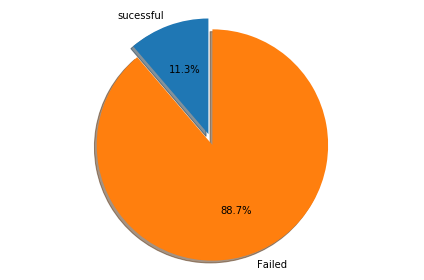

In [66]:
labels = ['sucessful', 'Failed']
sizes = [11.27, 88.73]
# only "explode" the 'successful' slice
explode = (0, 0.1,)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

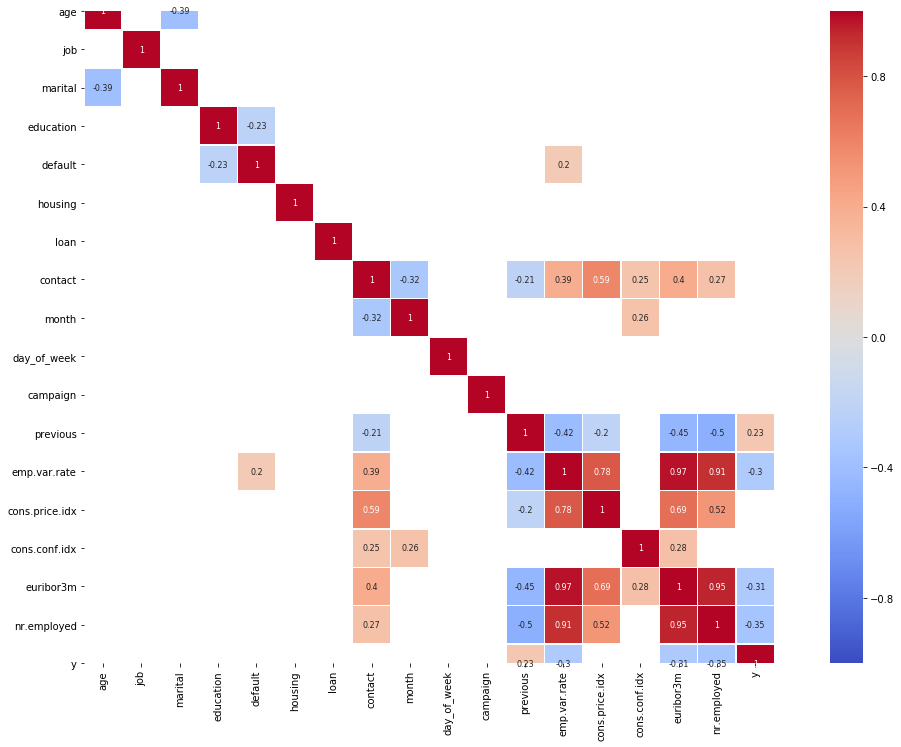

In [67]:
# The heat map below gives a quick summary of correlation between different features and variable Y. 
# The findings from this chart have been explained in detail using more detailed charts. 
# A review of this chart reveals that the features with the greatest correlation to variable ‘y’ are:
# contact, previous, emp.var.rate, euribor3m and nr.employed.

plt.subplots(figsize=(20,12))
corr = train.select_dtypes(include=['float64', 'int64', 'int8']).corr()
sns.heatmap(corr[(corr>=0.2)|(corr<=-0.2)], cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.4, 
annot=True, annot_kws={"size":8.00}, square=True);

Looking along dependent variable Y, the features most correlated are previous, emp.var.rate.euribor3m, and nr.employed

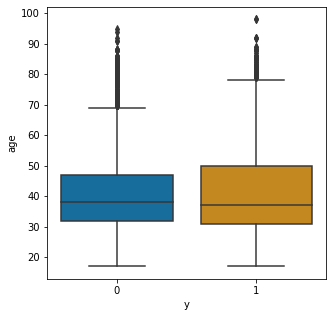

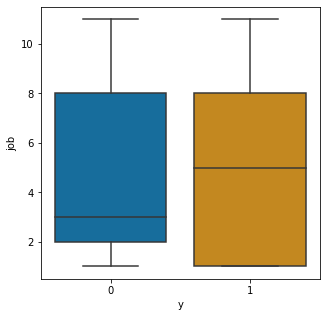

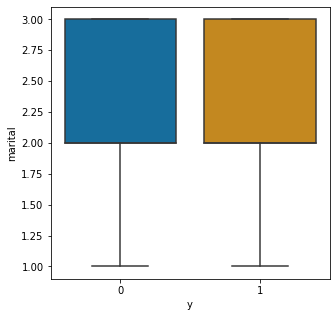

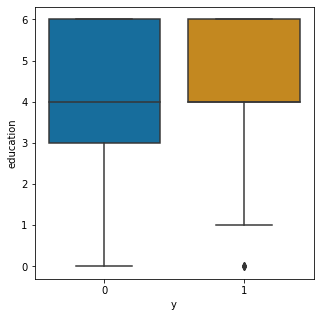

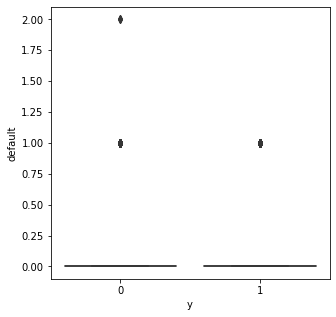

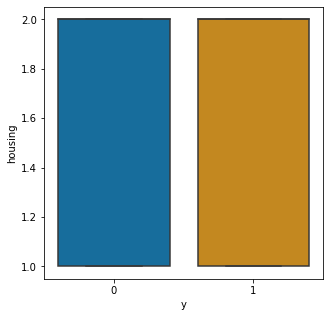

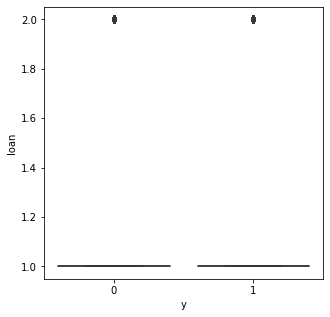

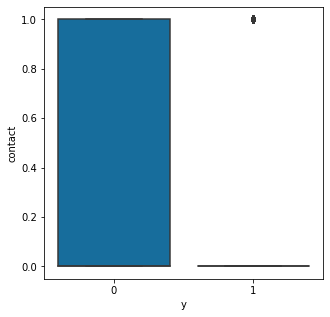

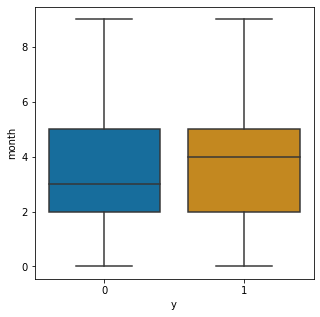

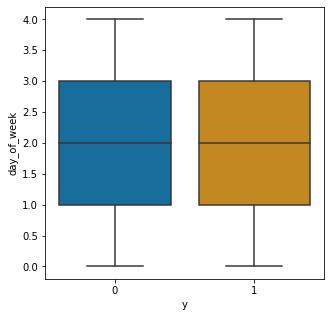

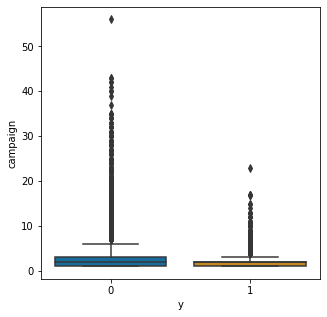

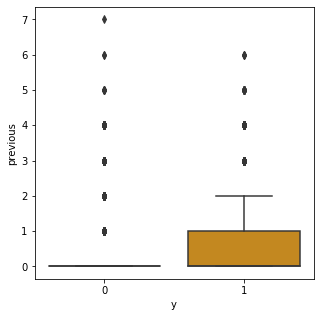

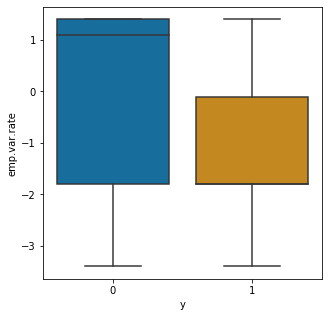

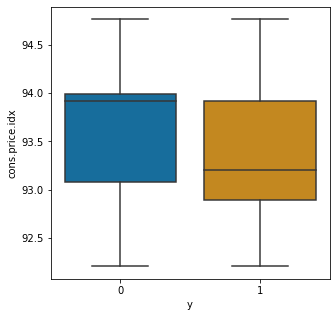

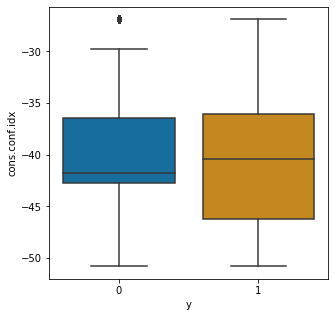

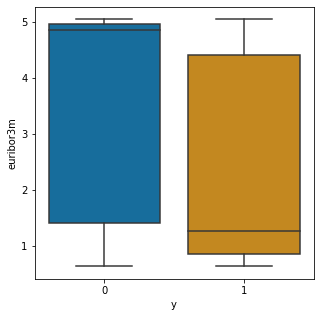

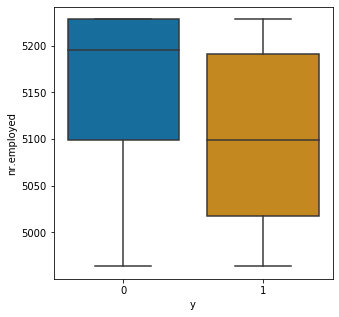

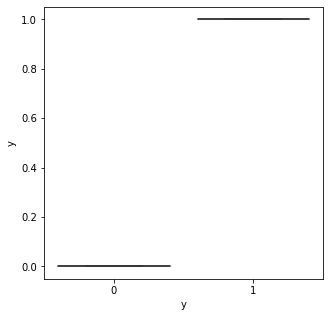

In [68]:
# Boxplots below give summary statistics of individual features and give an indication of potential outliers

boxplot = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y']
for col in boxplot:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, x='y', data=train, palette="colorblind")

In [69]:
# From the box plots above it appears that month, Day-of_week, marital and housing do not have an impact on subscription
# The type of Job that a customer does, appears to have an impact on whether they will subscribe to the term deposit or not(‘y’). 
# emp.var.rate', euribor3m, and nr.employed all have an impact on subscription
# Previous contact also appears to have an impact on subscrption


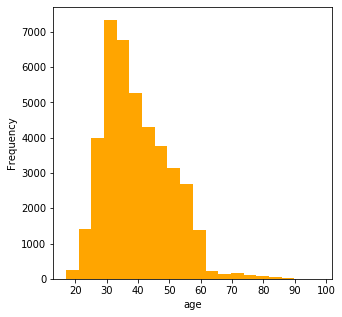

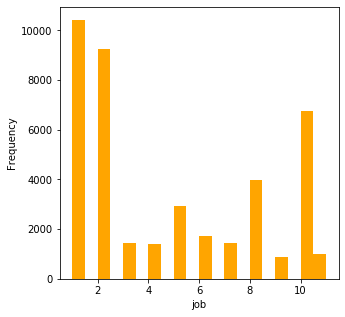

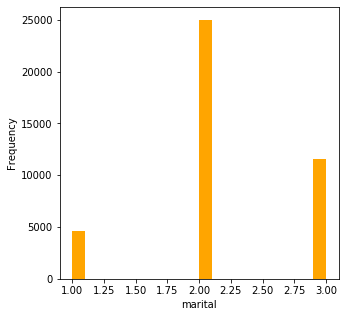

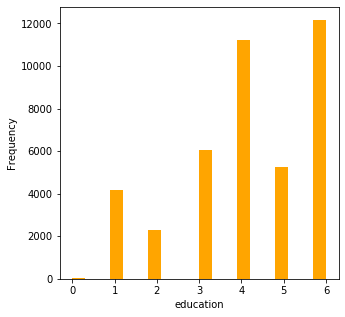

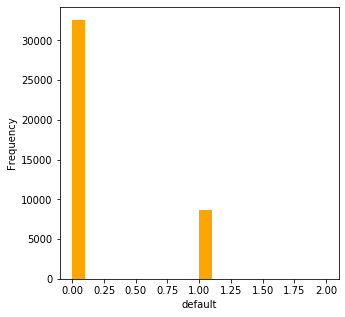

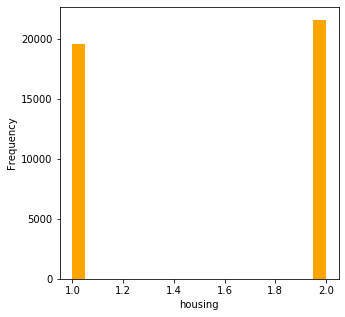

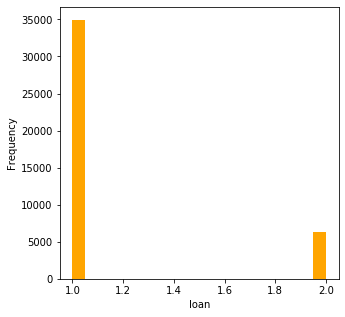

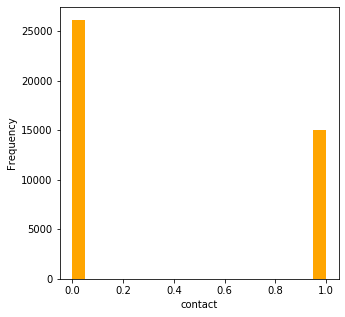

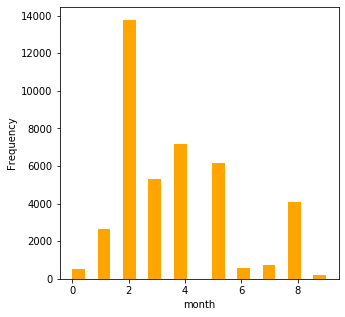

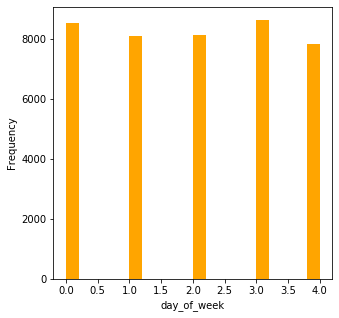

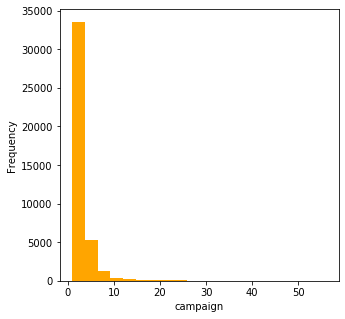

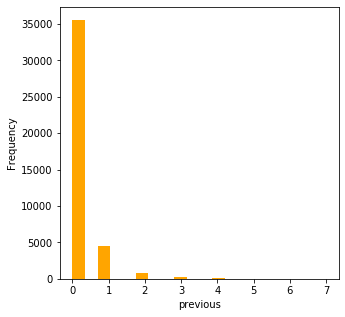

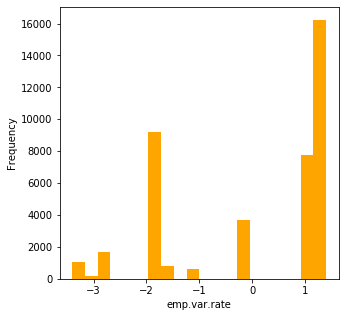

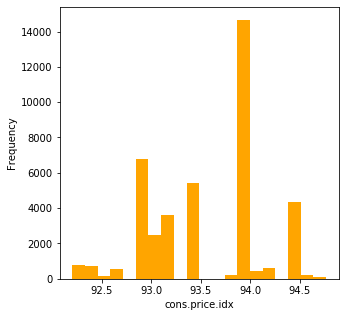

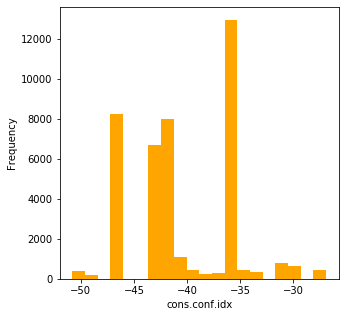

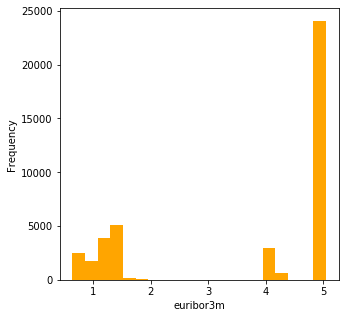

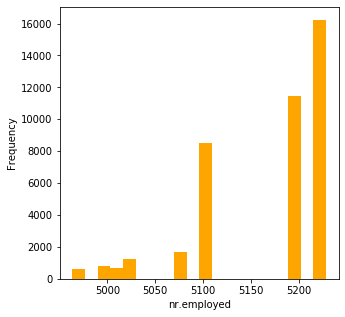

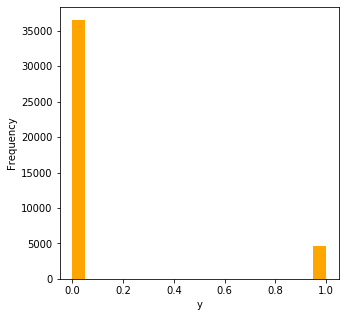

In [70]:
histogram = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

for col in histogram:
    plt.figure(figsize=(5, 5))
    train[col].plot(kind = "hist", bins=20, color= 'orange')
    plt.xlabel(col)

In [71]:
# nr.employed, eurobor3m and emp.var rates are multimodal and right skewed

# cons.cons.idx, and cons.price,idx are multi modal

# Campaign, and preious are right skewed, unimodal

# age is left skewed, unimodal

# education is right skewed unimodal

In [72]:
# The charts below show that most of the features are not correlated

# cons.price.idx', emp.var.rate', euribor3m, nr.employed are all relatively correlated

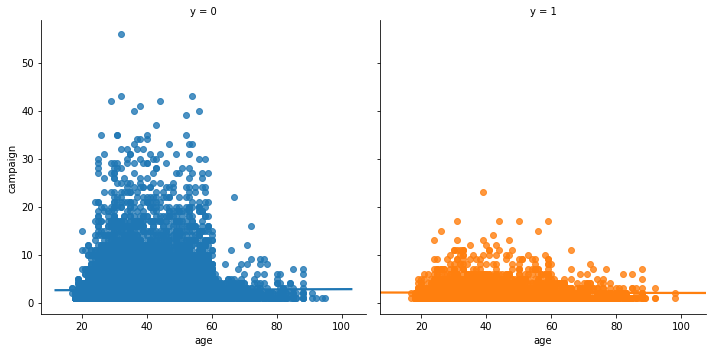

In [73]:
# 'age','campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

sns.lmplot(x='age', y='campaign', data = train, col='y', hue='y') 

sns.regplot(x=train['age'], y=train['previous']) 

sns.lmplot(x='age', y='emp.var.rate', data = train, col='y', hue='y') 

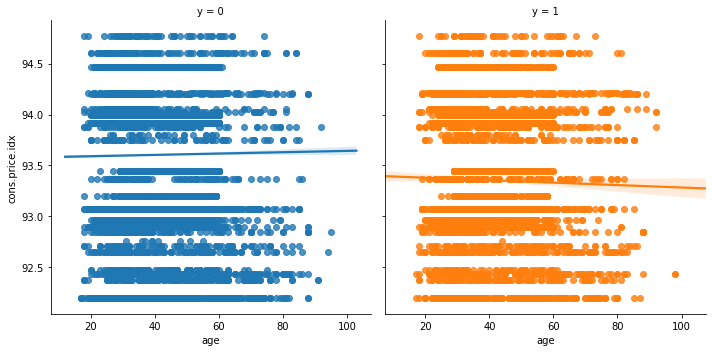

In [74]:
sns.lmplot(x='age', y='cons.price.idx', data = train, col='y', hue='y') 

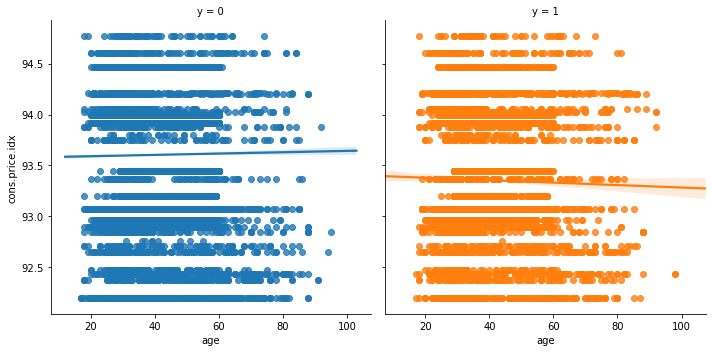

In [75]:
sns.lmplot(x='age', y='cons.price.idx', data = train, col='y', hue='y') 

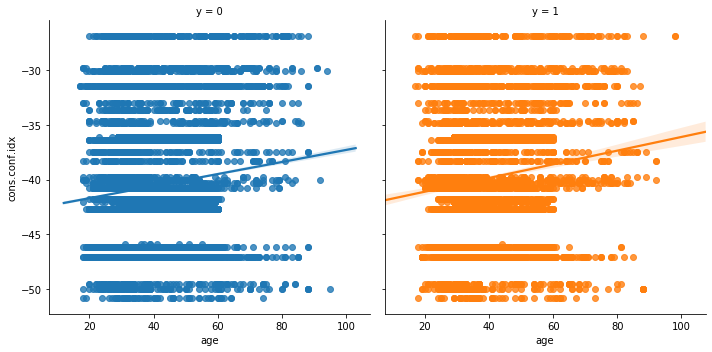

In [76]:
sns.lmplot(x='age', y='cons.conf.idx', data=train, col='y', hue='y') 

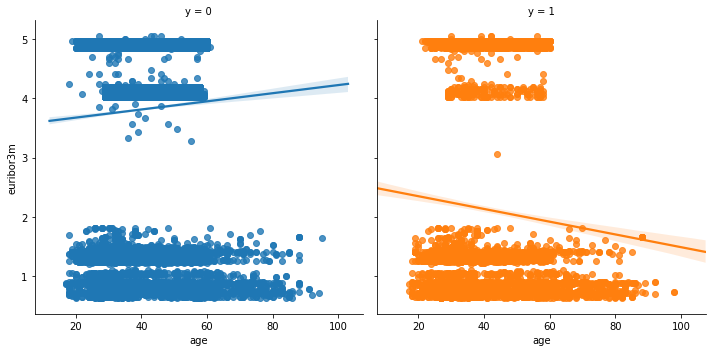

In [77]:
sns.lmplot(x='age', y='euribor3m', data = train, col='y', hue='y') 

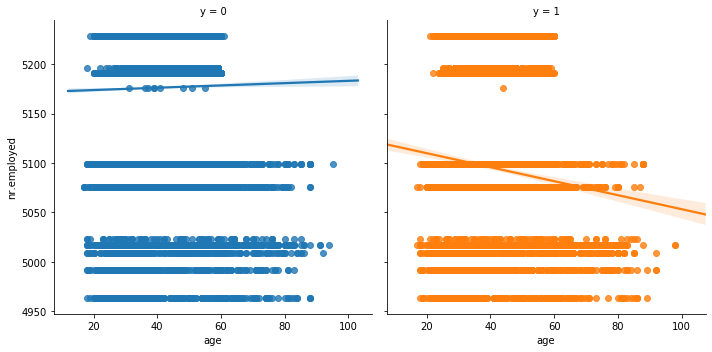

In [78]:
sns.lmplot(x='age', y='nr.employed', data = train, col='y', hue='y') 

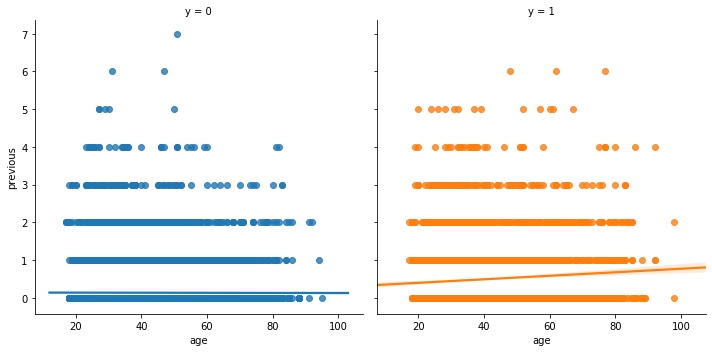

In [79]:
sns.lmplot(x='age', y='previous',  data = train, col='y', hue='y') 

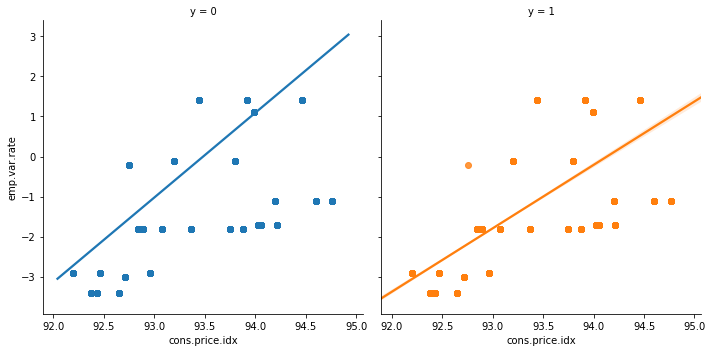

In [80]:
sns.lmplot(x='cons.price.idx', y='emp.var.rate', data = train, col='y', hue='y') 

In [81]:
# 'age','campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'


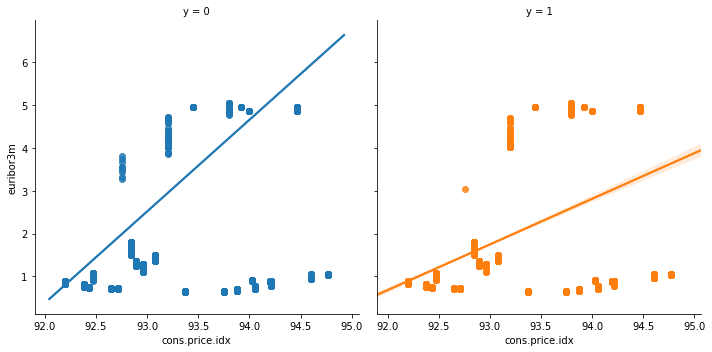

In [82]:
sns.lmplot(x='cons.price.idx', y='euribor3m', data = train, col='y', hue='y') 

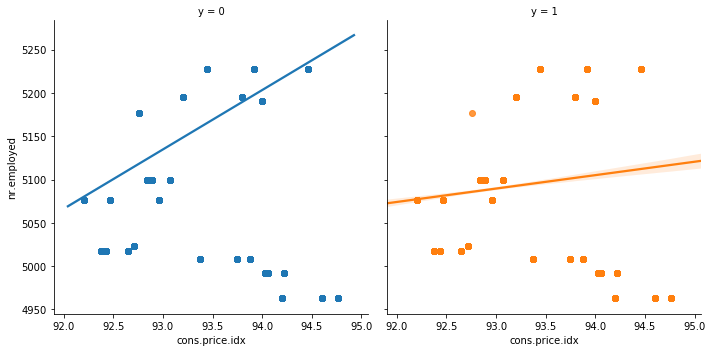

In [83]:
sns.lmplot(x='cons.price.idx', y='nr.employed', data = train, col='y', hue='y') 

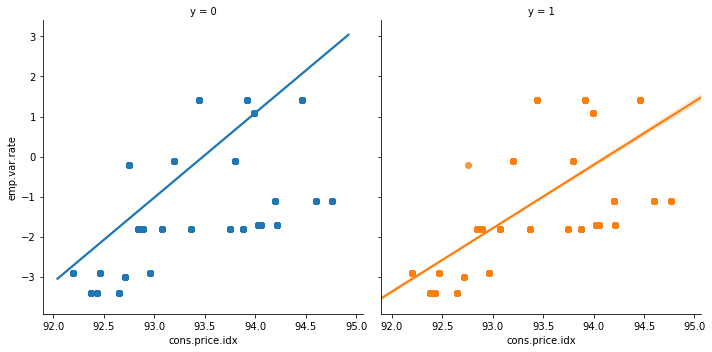

In [84]:
sns.lmplot(x='cons.price.idx', y='emp.var.rate', data = train, col='y', hue='y') 

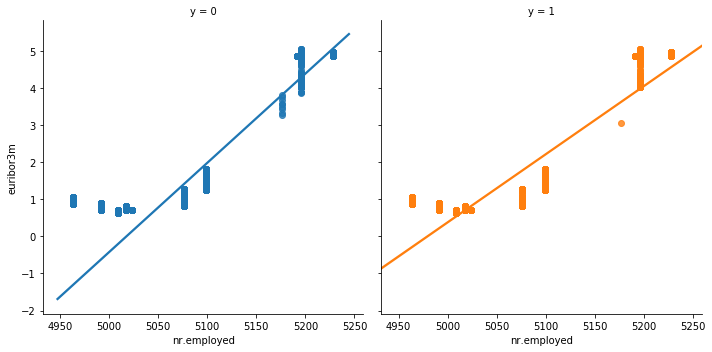

In [85]:
sns.lmplot(x='nr.employed', y='euribor3m', data = train, col='y', hue='y') 

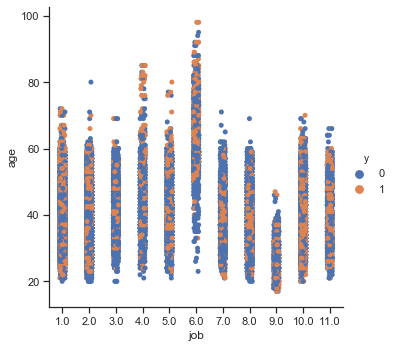

In [86]:
sns.set(style="ticks", color_codes=True)
sns.catplot(x="job", y="age", data=train, hue = 'y')

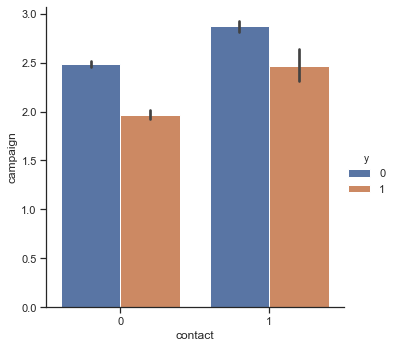

In [87]:
sns.catplot(x='contact', y='campaign', hue='y', kind="bar", data=train)

In [88]:
# Of the customers contacted, the customers contacted by telephone appeared to be most likely to subscribe. 

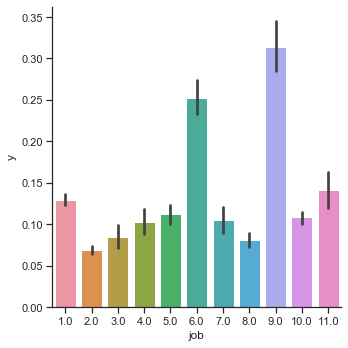

In [89]:
sns.catplot(x="job", y="y", kind="bar", data=train)

In [90]:
# Retirees and students in particular are more likely to subscribe, 
# while blue collar (the second largest category, is least likely to subscribe

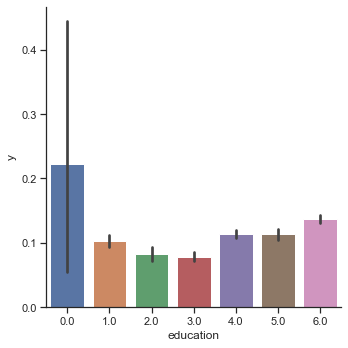

In [91]:
sns.catplot(x="education", y="y", kind="bar", data=train)

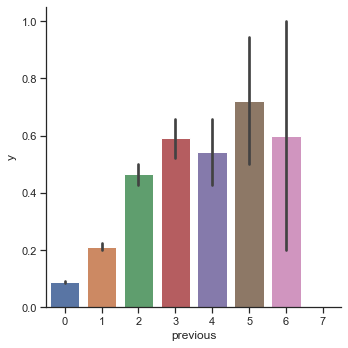

In [92]:
sns.catplot(x="previous", y="y", kind="bar", data=train)

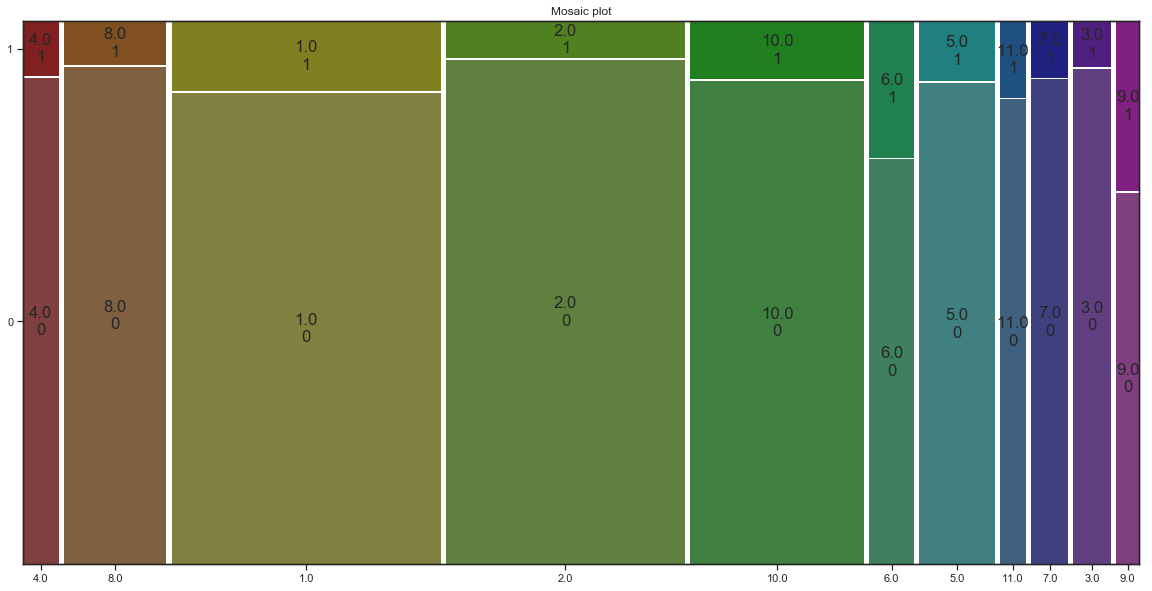

In [93]:
# Mosaic displays impact of categorical features on dependent variable 'y'
plt.rcParams['font.size'] = 20.0
plt.rcParams['figure.figsize'] = 20,10
mosaic(train, ['job', 'y'],  title = "Mosaic plot" )
plt.show()

In [94]:
# Retirees and students in particular are more likely to subscribe, 
# while blue collar (the second largest category, is least likely to subscribe

C:\Users\fkole\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\fkole\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


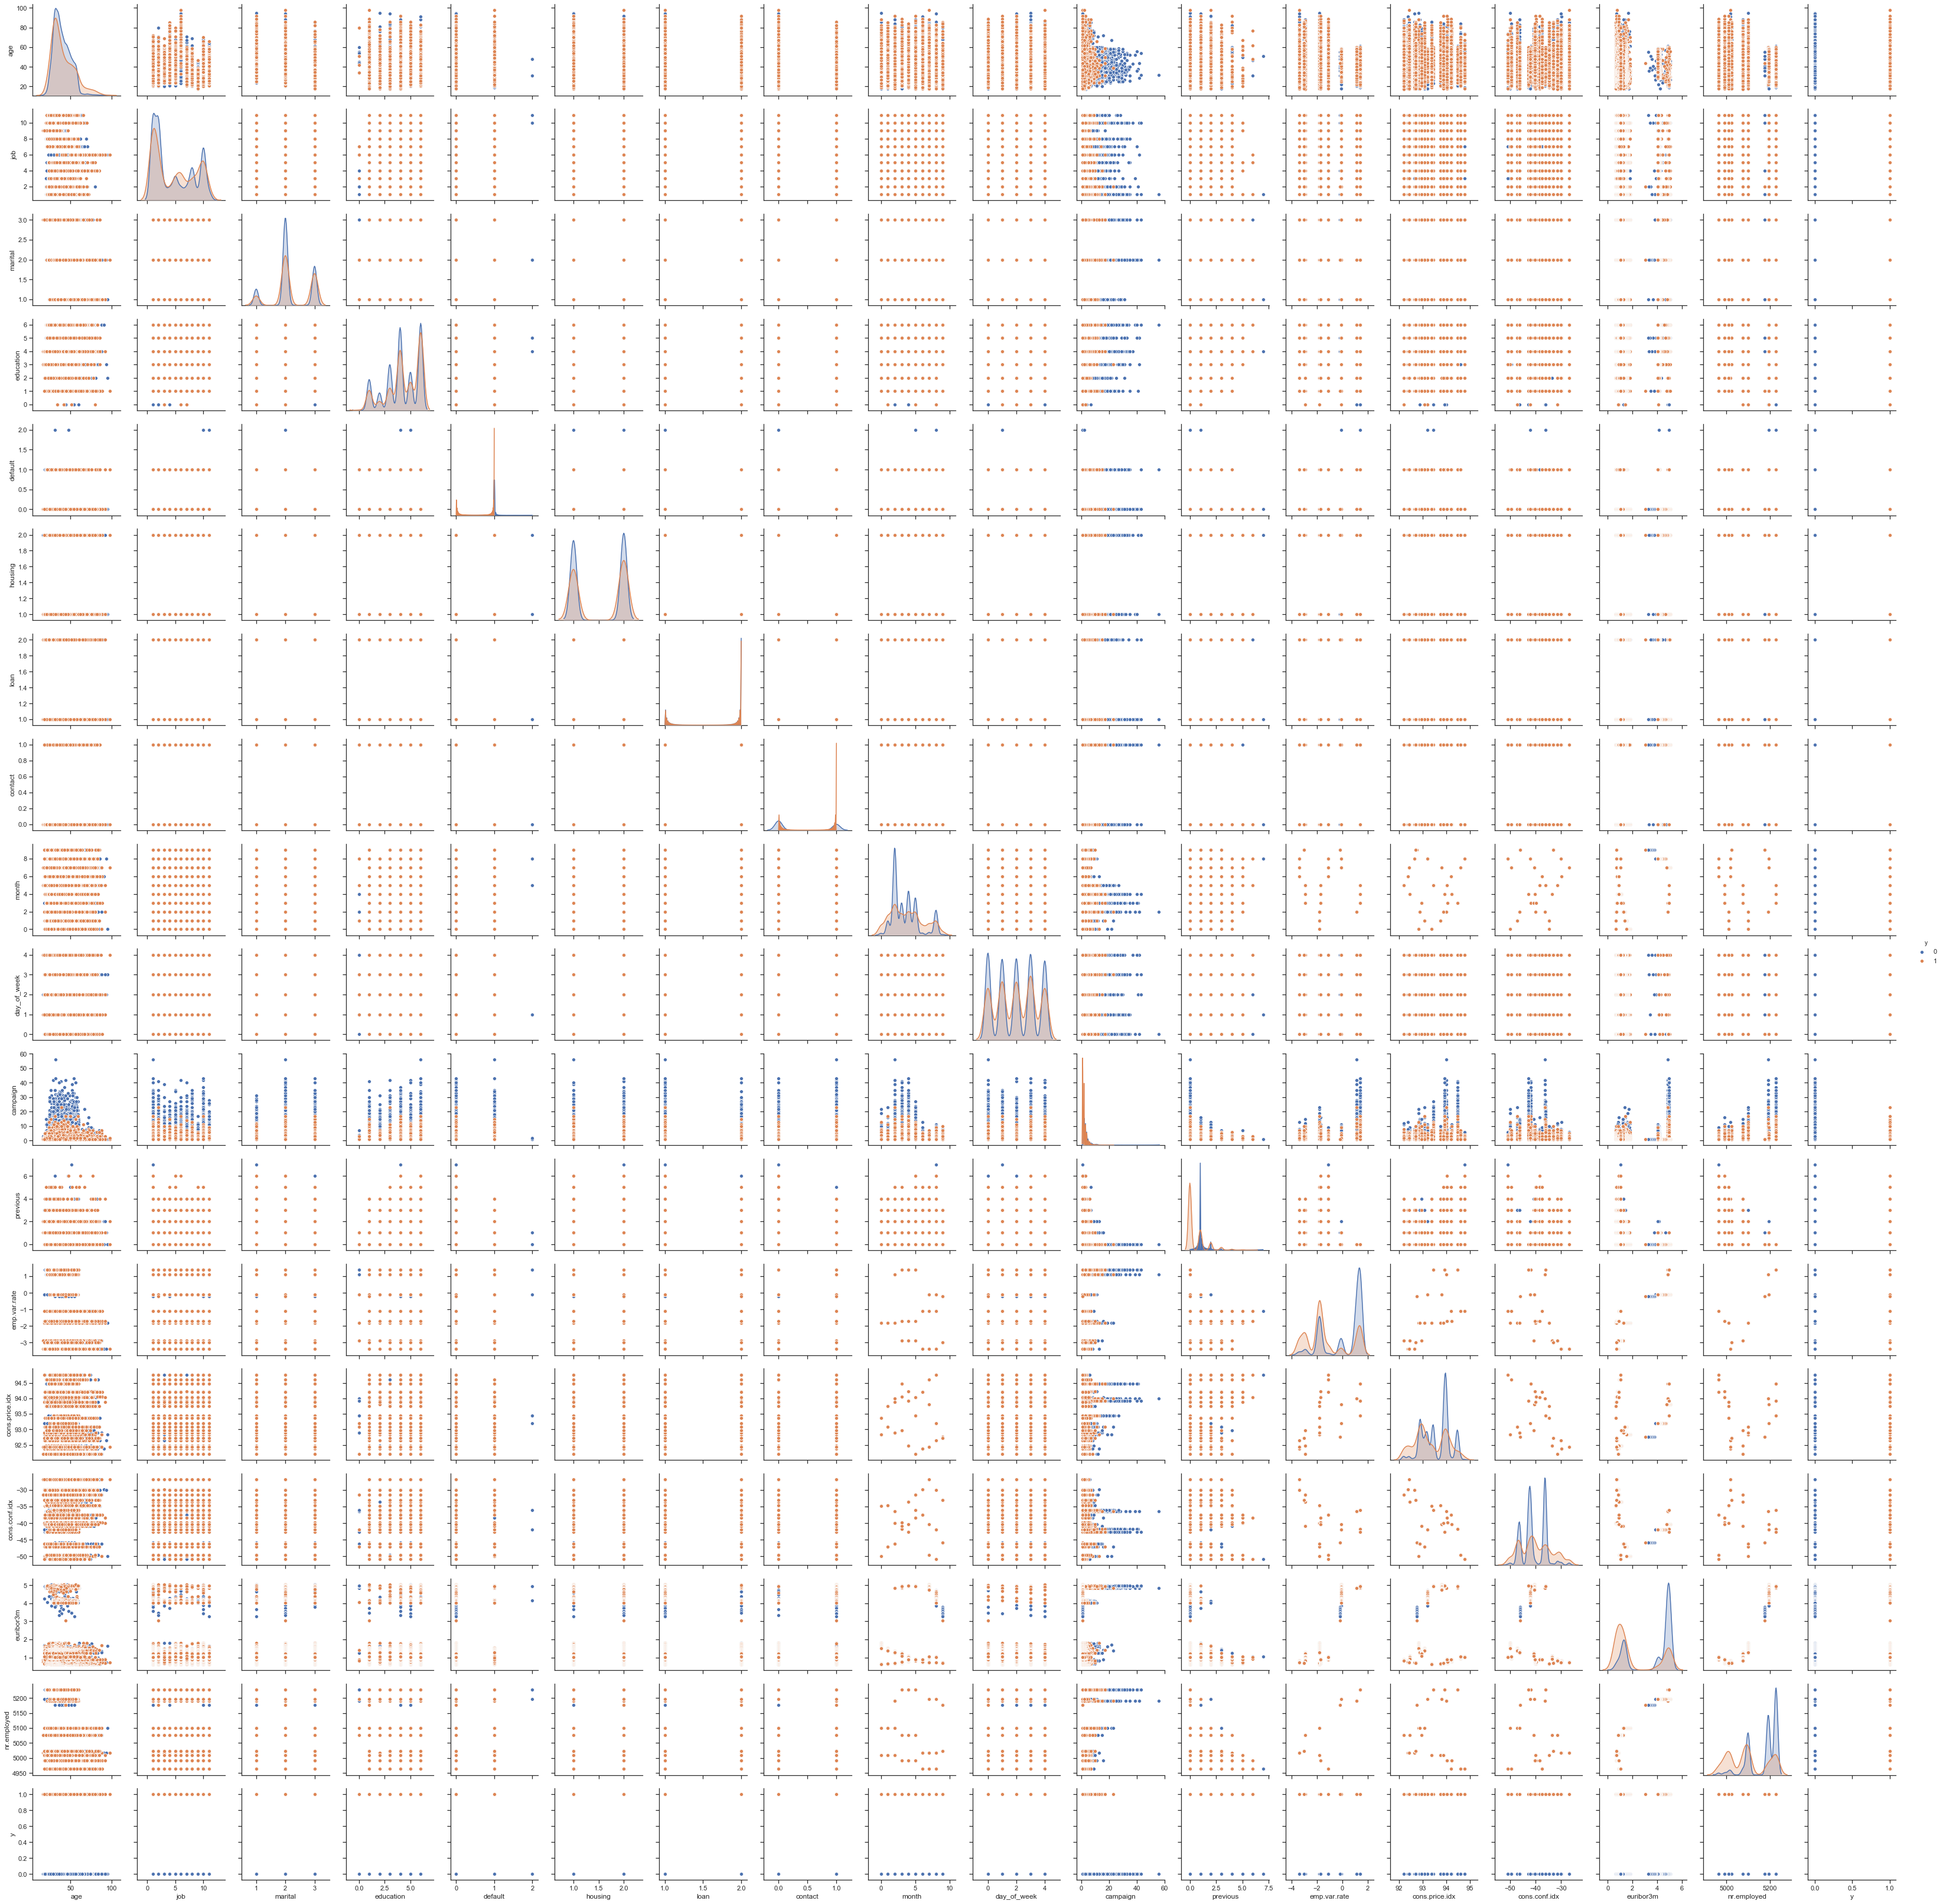

In [95]:
sns.set(style="ticks")

sns.pairplot(train, hue='y')

#### STATISTICAL DATA ANALYSIS: FREQUENTIST INFERENCE

#### The first frequentist test performed: 
Hypothesis Test of Difference Between Proportions using two-proportion z-test. We will be testing the difference in the proportion of yes's in telephone and cellular to determine statistical significance

State the Hypothesis:

Null Hypothesis: There is no difference between the proportion of yes's in contact methods telephone and cellular

Alternate Hypothesis: There is a difference between the proportion of yes's in contact methods telephone and cellular

In [96]:
# Calculate proportion of yes in telephone contact


In [97]:
# Read data and create a dataframe of contact and ddependent variable 'y' 
train_df = pd.read_csv(r"C:\Users\fkole\Desktop\springboard\Capstone_1\bank-additional-full.csv", sep=';')
train_df = train_df.drop_duplicates()
train_data = train_df[['contact', 'y']]

In [98]:
cell_data = train_data.loc[train_data.contact == 'cellular']
cell_data.shape

(26135, 2)

In [99]:
cellular_yes = cell_data.loc[cell_data.y == 'yes'].contact.count()
print(cellular_yes)

3852


In [100]:
tele_data = train_data.loc[train_data.contact == 'telephone']
tele_data.shape

(15041, 2)

In [101]:
telephone_yes = tele_data.loc[tele_data.y == 'yes'].contact.count()
print(telephone_yes)

787


In [102]:
p1 = cell_data.loc[cell_data.y == 'yes'].contact.count() / train_data.loc[train_data.contact == 'cellular'].contact.count()

In [103]:
p2 = tele_data.loc[tele_data.y == 'yes'].contact.count() / train_data.loc[train_data.contact == 'telephone'].contact.count()

In [104]:
n1 = cell_data.contact.count()

In [105]:
n2 = tele_data.contact.count()

In [106]:
# calculate probability
p = (p1 * n1 + p2 * n2) / (n1 + n2)

In [107]:
# Calculate standard error
standard_error = np.sqrt( p * ( 1 - p ) * ((1/n1) + (1/n2)))

In [108]:
z_score = (p1 - p2) / standard_error
z_score

29.37739625383253

In [109]:
p_value = 1 - norm.cdf(z_score)
p_value

0.0

The difference is very significant, therefore we reject the null hypothesis

#### Second Frequentist test: use the T-Test for numeric variables

In [110]:
x= train_df['nr.employed']

In [111]:
y= train_df['emp.var.rate']

In [112]:
t, p = ttest_ind(x, y, equal_var=False)

In [113]:
print(t, p)

14508.012150383513 0.0


P is significant

#### MACHINE LEARNING

#### MODEL 1: Logistic Regression

Build the logistic Regression model and evaluate it with the ROC Curve

In [114]:
X = train.drop('y', axis=1).values
y = train['y'].values

In [115]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# standardize data using skelarn’s StandardScaler
#scaler = StandardScaler()
#X_train, y_train = scaler.fit_transform(X_train, y_train)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)


# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [116]:
print("train accuracy: ", logreg.score(X_train, y_train))
print("test accuracy: ", logreg.score(X_test, y_test))
#print("train accuracy: ", logreg.score(X_train_smote, y_train_smote))
#print("test accuracy: ", logreg.score(X_test, y_test))

train accuracy:  0.7274357748018584
test accuracy:  0.7587421078193298


In [117]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))


[[5588 1677]
 [ 310  661]]


In [118]:
target_names = ['Subscribed: No', 'Subscribed: Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

 Subscribed: No       0.95      0.77      0.85      7265
Subscribed: Yes       0.28      0.68      0.40       971

       accuracy                           0.76      8236
      macro avg       0.62      0.72      0.62      8236
   weighted avg       0.87      0.76      0.80      8236



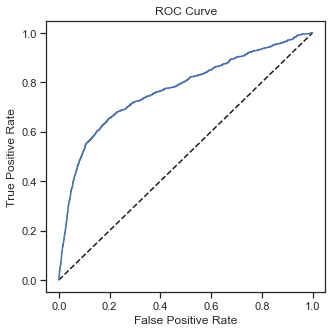

In [119]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [120]:
# Create the classifier: logreg
roc_auc_score(y_test, y_pred_prob)

0.7702742931099618

In [121]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.24007833 0.87907678 0.82019117 0.55792819 0.74018965]


#### Logistic Regression gave us about 73% accuracy on train and 76% accuracy on test data. Confusion matrix shows that the model correctly predicted 5588 no subscription(0), and 661 subsciption(1) with 6249 correct prediction in total and we had 1987 incorrect prediction in total (310 false positives and 1677 false negatives). This means that 1677 customers who could have subscribed would have been ignored, while 310 customers who would not have subscribed would have been targeted for marketing campaigns, this any resources allocated would have been a waste.


#### MODEL 2: Random Forest


Build the Random Forest model and evaluate it with the ROC Curve

In [122]:
# Create training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = 0.2, random_state=42)

#Perform Hyperparametization
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

#Loop through the parameter grid, set the hyperparameters, and save the scores
#for g in ParameterGrid(grid):
    #random_forest.set_params(**g)  # ** is "unpacking" the dictionary
    #random_forest.fit(X_train_rf, y_train_rf)
    #test_scores.append(random_forest.score(X_test_rf, y_test_rf))

# Create the classifier: random_forest
#random_forest = RandomForestClassifier(n_estimators=200, max_depth = 3, max_features=17, random_state=42)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [123]:
rf = RandomForestClassifier()
random_forest = RandomizedSearchCV (estimator = rf, param_distributions  = random_grid, n_jobs = -1, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [ ]:
# Fit the classifier to the training data
random_forest.fit(X_train_rf, y_train_rf)

# predict X_test_rf
y_pred_rf = random_forest.predict(X_test_rf)
y_pred_prob_rf = random_forest.predict_proba(X_test_rf)[:,1]

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.3min


In [1]:
print("train accuracy: ", random_forest.score(X_train_rf, y_train_rf))
print("test accuracy: ", random_forest.score(X_t[InternetShortcut]
URL=http://localhost:8888/notebooks/Desktop/springboard/Capstone_1/Capstone_Project_1.ipynb#
est_rf, y_test_rf))

SyntaxError: invalid syntax (<ipython-input-1-5c83ef8e7932>, line 3)

In [ ]:
print(metrics.accuracy_score(y_test_rf, y_pred_rf))

In [ ]:
# Compute and # Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_prob_rf)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() the confusion matrix and classification report
print(confusion_matrix(y_test_rf, y_pred_rf))
target_names = ['Subscribed: No', 'Subscribed: Yes']
print(classification_report(y_test_rf, y_pred_rf, target_names=target_names))

Random Forest gave us about 91% on train and 89% accuracy both on train and test data. Confusion matrix shows that the model correctly predicted 7118 no subscription(0), and 226 subsciption(1) with 7344 correct prediction in total and we had 892 incorrect prediction in total (147 false positives and 745 false negatives). This means that 745 customers who could have subscribed would have been ignored, while 147 customers who would not have subscribed would have been targeted for marketing campaigns, thus any resources allocated would have been a waste.

In [ ]:
# Create the classifier: logreg
roc_auc_score(y_test_rf, y_pred_prob_rf)